In [1]:
# https://www.shutterstock.com/search/id-photo?dd_referrer=https%3A%2F%2Fwww.google.com%2F
# https://docs.opencv.org/4.x/d3/df2/tutorial_py_basic_ops.html
# https://docs.opencv.org/4.x/d3/db4/tutorial_py_watershed.html
# https://docs.opencv.org/4.x/d1/db7/tutorial_py_histogram_begins.html

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Criando a função de split da imagem

In [3]:
def split_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    h, w = img.shape

    # Simetria vertical
    mid_w = w // 2
    left = img[:, :mid_w]
    right = np.fliplr(img[:, -mid_w:]) 

    # Simetria horizontal
    mid_h = h // 2
    top = img[:mid_h, :]
    bottom = np.flipud(img[-mid_h:, :])  

    return img, left, right, top, bottom

In [4]:
img, left, right, top, bottom = split_image('images/Middle east_23_Male_National_ID.jpg')

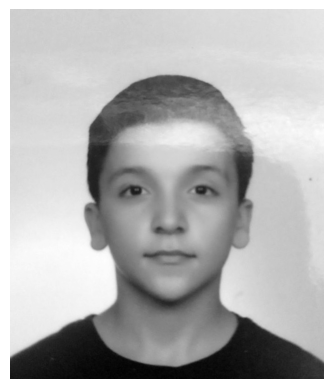

In [5]:
plt.imshow(img, cmap='gray')  # 'cmap=gray' para manter tons de cinza
plt.axis('off')               # Remove eixos
plt.show()


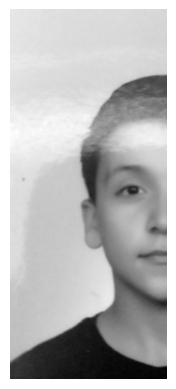

In [6]:
plt.imshow(right, cmap='gray')  
plt.axis('off')               
plt.show()

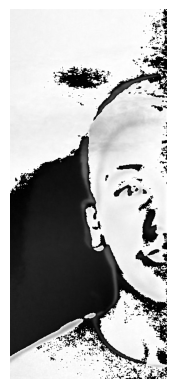

In [7]:
plt.imshow(left-right, cmap='gray')  
plt.axis('off')               
plt.show()

## Testando o matchTemplate

In [8]:
# 'images/African_female_32_Passport.jpg'
# 'images/Middle east_23_Male_National_ID.jpg'
# 'images/examples/Middle east_23_Male_National_ID_rotated_180.jpg'
# 'images/Hispanic_Male_32_National_ID.jpg'
# 'images/Hispanic_Male_37_Passport.jpg'

img, left, right, top, bottom = split_image('images/Hispanic_Male_32_National_ID.jpg')

In [9]:
correlation = cv2.matchTemplate(left.astype(np.float32), 
                                          right.astype(np.float32), 
                                          cv2.TM_CCOEFF_NORMED)[0,0]
correlation

np.float32(0.84807163)

In [10]:
correlation = cv2.matchTemplate(bottom.astype(np.float32), 
                                          top.astype(np.float32), 
                                          cv2.TM_CCOEFF_NORMED)[0,0]
correlation

np.float32(-0.22316961)

### Decidindo entre média, variância ou soma para a orientação do rosto

In [11]:
print(np.mean(top))
print(np.mean(bottom))

print("*************")

print(np.mean(left))
print(np.mean(right))

184.71340082079342
137.59845964432284
*************
156.45107450444291
165.88247846889954


In [12]:
print(np.var(top))
print(np.var(bottom))

print("*************")

print(np.var(left))
print(np.var(right))

595.0007692552114
1817.1526832634197
*************
1709.06223377367
1766.7774272406505


In [13]:
print(np.sum(top))
print(np.sum(bottom))

print("*************")

print(np.sum(left))
print(np.sum(right))

135025496
100584474
*************
114443961
121343033


## Testando detecção de bordas (para olhos, boca, etc) com Harris

In [15]:
filename = 'images/Middle east_23_Male_National_ID.jpg'
img = cv2.imread(filename)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)

#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)
 
# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.05*dst.max()]=[0,0,255]
 
cv2.imshow('dst',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Testando criar contornos na silhueta do rosto

In [16]:
# 'images/African_female_32_Passport.jpg'
# 'images/Middle east_23_Male_National_ID.jpg'
# 'images/examples/Middle east_23_Male_National_ID_rotated_180.jpg'
# 'images/Hispanic_Male_32_National_ID.jpg'
# Read image
image = cv2.imread('images/African_female_32_Passport.jpg')
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(img_gray, 150, 255, cv2.THRESH_BINARY)

contours, hierarchy = cv2.findContours(image=thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_SIMPLE)
                                      
image_copy = image.copy()
cv2.drawContours(image=image_copy, contours=contours, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)
                
# see the results
cv2.imshow('None approximation', image_copy)
cv2.waitKey(0)
cv2.imwrite('contours_none_image1.jpg', image_copy)
cv2.destroyAllWindows()


In [17]:
image1 = cv2.imread('images/Middle east_23_Male_National_ID.jpg')
img_gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)

ret, thresh1 = cv2.threshold(img_gray1, 150, 255, cv2.THRESH_BINARY)
contours2, hierarchy2 = cv2.findContours(thresh1, cv2.RETR_TREE,
                                               cv2.CHAIN_APPROX_SIMPLE)
image_copy2 = image1.copy()
cv2.drawContours(image_copy2, contours2, -1, (0, 255, 0), 2, cv2.LINE_AA)
cv2.imshow('SIMPLE Approximation contours', image_copy2)
cv2.waitKey(0)
image_copy3 = image1.copy()
for i, contour in enumerate(contours2): # loop over one contour area
   for j, contour_point in enumerate(contour): # loop over the points
       # draw a circle on the current contour coordinate
       cv2.circle(image_copy3, ((contour_point[0][0], contour_point[0][1])), 2, (0, 255, 0), 2, cv2.LINE_AA)
# see the results
cv2.imshow('CHAIN_APPROX_SIMPLE Point only', image_copy3)
cv2.waitKey(0)
cv2.imwrite('contour_point_simple.jpg', image_copy3)
cv2.destroyAllWindows()

## Testando Blob Detection para olhos

In [18]:
# 'images/African_female_32_Passport.jpg'
# 'images/Middle east_23_Male_National_ID.jpg'
# 'images/examples/Middle east_23_Male_National_ID_rotated_180.jpg'
# 'images/Hispanic_Male_32_National_ID.jpg'
# Read image
im = cv2.imread('images/Middle east_23_Male_National_ID.jpg', cv2.IMREAD_GRAYSCALE)
 
# Setup SimpleBlobDetector parameters.
params = cv2.SimpleBlobDetector_Params()
 
# Change thresholds
params.minThreshold = 10;
params.maxThreshold = 200;
 
# Filter by Area.
params.filterByArea = True
params.minArea = 150
 
# Filter by Circularity
params.filterByCircularity = True
params.minCircularity = 0.1
 
# Filter by Convexity
params.filterByConvexity = True
params.minConvexity = 0.8
 
# Filter by Inertia
params.filterByInertia = True
params.minInertiaRatio = 0.01
 
# Create a detector with the parameters
detector = cv2.SimpleBlobDetector_create(params)

# Detect blobs.
keypoints = detector.detect(im)
# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of the circle corresponds to the size of blob
im_with_keypoints = cv2.drawKeypoints(im, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
 
# Show keypoints
cv2.imshow("Keypoints", im_with_keypoints)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Testando Sobel para detecção de olhos, bocas, etc

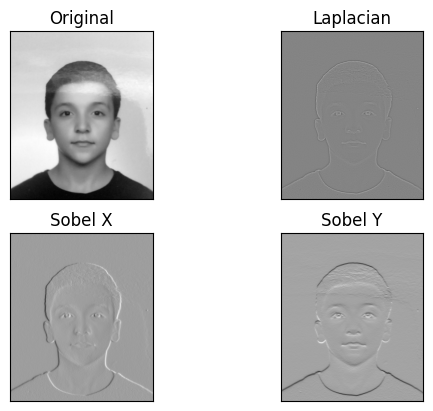

In [21]:
img = cv2.imread('images/Middle east_23_Male_National_ID.jpg', cv2.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
 
laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)
 
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
 
plt.show()


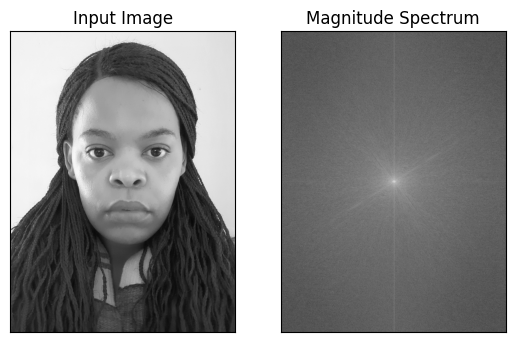

In [22]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
 
img = cv.imread('images/African_female_32_Passport.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
 
dft = cv.dft(np.float32(img),flags = cv.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
 
magnitude_spectrum = 20*np.log(cv.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
 
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()


## Testando Canny (tentando um contorno, silhueta, ou algo do tipo)

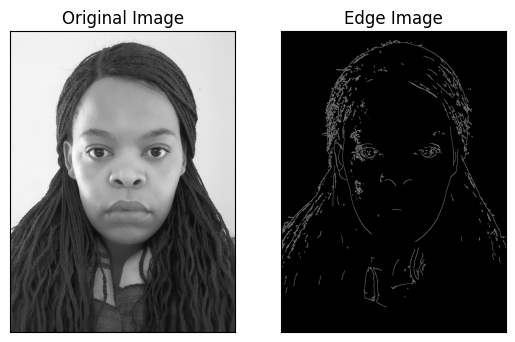

In [23]:
# 'images/African_female_32_Passport.jpg'
# 'images/examples/Middle east_23_Male_National_ID.jpg'
img = cv2.imread('images/African_female_32_Passport.jpg', cv2.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"

edges = cv2.Canny(img,100,250)
 
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
 
plt.show()